In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn

In [2]:
#Load data
cts=['3.1','3.2','3.3','3.4','3.5','3.6','4.1','4.2','4.3','4.4','4.5','4.6','4.7','4.8','4.9','4.10']
sol_cts=['3.1','3.2','3.3','3.4','3.5','3.6']
closed_cts=['4.1','4.2','4.3','4.4','4.5','4.6','4.7','4.8','4.9','4.10']
prot_data=pd.read_csv('new_prot_results.csv')
suppl_data=pd.read_csv('repeatsdb_supplemented_updated.csv',dtype={'ct':str})

In [3]:
prot_data['pdb_id']=prot_data['pdb_id'].add(prot_data['chain'])

In [4]:
prot_data=prot_data.merge(suppl_data,left_on='pdb_id',right_on='pdb')

In [5]:
prot_data

,Unnamed: 0,pdb_id,chain,curvature_mean,curvature_std,twist_mean,twist_std,pitch_mean,pitch_std,handendness_mean,...,region_id,uniprot,ctfc,units,units_num,units_avg,insertions,insertions_num,pdb,ct
0,0,4zb5A,A,0.879028,0.223238,0.102622,0.341328,0.047470,0.248628,0.428571,...,4zb5A_11_311,P24300,4.5.0.0,"11_49,50_87,88_132,133_176,177_211,212_244,245...",8,36.62,NaN,0,4zb5A,4.5
1,1,5zbgA,A,0.002587,0.000113,-0.134417,0.022759,0.158667,0.088484,-1.000000,...,5zbgA_24_171,Q13507,3.3.0,"24_53,54_87,88_116,117_171",4,36.00,121_149,1,5zbgA,3.3
2,2,2zb5A,A,1.015323,0.347945,0.011281,0.577432,0.030996,0.229063,-0.600000,...,2zb5A_215_606,P08362,4.4.0.0,"215_285,286_345,346_441,442_482,509_561,562_606",6,60.00,"372_408,483_508",2,2zb5A,4.4
3,3,4zb4A,A,0.887671,0.112012,0.445627,1.205233,0.104063,0.255780,0.000000,...,4zb4A_188_502,P32523,4.4.0.0,"188_247,248_287,288_334,335_376,377_423,424_47...",7,44.00,NaN,0,4zb4A,4.4
4,4,4zb2A,A,0.849119,0.225213,0.058011,0.373883,0.050576,0.299328,0.142857,...,4zb2A_11_311,P24300,4.5.0.0,"11_49,50_84,85_132,133_176,177_211,212_244,245...",8,36.62,NaN,0,4zb2A,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10405,9481,3ltpA,A,0.799522,0.187208,0.049321,0.458573,-0.002647,0.195583,0.428571,...,3ltpA_15_225,O26232,4.1.0.0,"15_38,39_65,66_92,93_118,119_151,152_173,174_1...",8,25.38,NaN,0,3ltpA,4.1
10406,9482,3ltsB,B,0.845601,0.201104,0.013735,0.398247,0.004695,0.230348,-0.142857,...,3ltsB_15_221,O26232,4.1.0.0,"15_38,39_65,66_92,93_118,119_151,152_173,174_1...",8,24.88,NaN,0,3ltsB,4.1
10407,9483,5ltdA,A,0.852574,0.093018,-0.122846,0.184818,0.018115,0.129378,-0.333333,...,5ltdA_33_524,Q5QA94,4.4.1,"33_72,73_120,121_159,160_224,225_269,270_452,4...",7,69.29,462_489,1,5ltdA,4.4
10408,9484,3ltyB,B,0.841879,0.208024,-0.065649,0.284806,0.028976,0.218357,-0.142857,...,3ltyB_15_222,O26232,4.1.0.0,"15_38,39_65,66_92,93_118,119_151,152_173,174_1...",8,25.00,NaN,0,3ltyB,4.1


In [6]:
prot_data=prot_data[prot_data['ct'].isin(cts)]

In [7]:
prot_data

,Unnamed: 0,pdb_id,chain,curvature_mean,curvature_std,twist_mean,twist_std,pitch_mean,pitch_std,handendness_mean,...,region_id,uniprot,ctfc,units,units_num,units_avg,insertions,insertions_num,pdb,ct
0,0,4zb5A,A,0.879028,0.223238,0.102622,0.341328,0.047470,0.248628,0.428571,...,4zb5A_11_311,P24300,4.5.0.0,"11_49,50_87,88_132,133_176,177_211,212_244,245...",8,36.62,NaN,0,4zb5A,4.5
1,1,5zbgA,A,0.002587,0.000113,-0.134417,0.022759,0.158667,0.088484,-1.000000,...,5zbgA_24_171,Q13507,3.3.0,"24_53,54_87,88_116,117_171",4,36.00,121_149,1,5zbgA,3.3
2,2,2zb5A,A,1.015323,0.347945,0.011281,0.577432,0.030996,0.229063,-0.600000,...,2zb5A_215_606,P08362,4.4.0.0,"215_285,286_345,346_441,442_482,509_561,562_606",6,60.00,"372_408,483_508",2,2zb5A,4.4
3,3,4zb4A,A,0.887671,0.112012,0.445627,1.205233,0.104063,0.255780,0.000000,...,4zb4A_188_502,P32523,4.4.0.0,"188_247,248_287,288_334,335_376,377_423,424_47...",7,44.00,NaN,0,4zb4A,4.4
4,4,4zb2A,A,0.849119,0.225213,0.058011,0.373883,0.050576,0.299328,0.142857,...,4zb2A_11_311,P24300,4.5.0.0,"11_49,50_84,85_132,133_176,177_211,212_244,245...",8,36.62,NaN,0,4zb2A,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10405,9481,3ltpA,A,0.799522,0.187208,0.049321,0.458573,-0.002647,0.195583,0.428571,...,3ltpA_15_225,O26232,4.1.0.0,"15_38,39_65,66_92,93_118,119_151,152_173,174_1...",8,25.38,NaN,0,3ltpA,4.1
10406,9482,3ltsB,B,0.845601,0.201104,0.013735,0.398247,0.004695,0.230348,-0.142857,...,3ltsB_15_221,O26232,4.1.0.0,"15_38,39_65,66_92,93_118,119_151,152_173,174_1...",8,24.88,NaN,0,3ltsB,4.1
10407,9483,5ltdA,A,0.852574,0.093018,-0.122846,0.184818,0.018115,0.129378,-0.333333,...,5ltdA_33_524,Q5QA94,4.4.1,"33_72,73_120,121_159,160_224,225_269,270_452,4...",7,69.29,462_489,1,5ltdA,4.4
10408,9484,3ltyB,B,0.841879,0.208024,-0.065649,0.284806,0.028976,0.218357,-0.142857,...,3ltyB_15_222,O26232,4.1.0.0,"15_38,39_65,66_92,93_118,119_151,152_173,174_1...",8,25.00,NaN,0,3ltyB,4.1


# Protein level results

## Correlations

In [8]:
prot_data.corr(numeric_only=True)

,Unnamed: 0,curvature_mean,curvature_std,twist_mean,twist_std,pitch_mean,pitch_std,handendness_mean,handedness_std,TMscore_mean,TMscore_std,yaw_mean,yaw_std,units_num,units_avg,insertions_num
Unnamed: 0,1.000000,0.032121,0.065589,0.030420,0.038071,0.027965,0.022487,-0.010073,0.016438,-0.032337,0.010674,-0.012914,0.038552,0.002380,-0.017498,0.012031
curvature_mean,0.032121,1.000000,0.527237,-0.066400,0.125092,-0.140907,0.270944,0.022065,0.150338,0.129684,-0.304690,-0.075946,0.248645,-0.336787,0.383338,0.021773
curvature_std,0.065589,0.527237,1.000000,-0.059777,0.475837,-0.103365,0.348559,-0.019628,0.059359,-0.226547,-0.255759,0.006022,0.590604,-0.172461,0.200119,0.156684
twist_mean,0.030420,-0.066400,-0.059777,1.000000,0.025755,0.208434,-0.142110,0.289847,-0.031054,0.122724,-0.001937,0.139787,-0.114251,0.037675,0.030169,-0.014857
twist_std,0.038071,0.125092,0.475837,0.025755,1.000000,-0.274880,0.418218,0.002093,0.104341,-0.177930,-0.118044,0.142159,0.748145,-0.122386,0.197619,0.035441
pitch_mean,0.027965,-0.140907,-0.103365,0.208434,-0.274880,1.000000,-0.274430,0.011279,-0.061661,-0.049412,0.086895,0.116862,-0.342855,0.037311,-0.247105,0.077791
pitch_std,0.022487,0.270944,0.348559,-0.142110,0.418218,-0.274430,1.000000,0.019280,0.089454,-0.318658,-0.169771,-0.154476,0.397131,-0.073705,-0.039884,0.038993
handendness_mean,-0.010073,0.022065,-0.019628,0.289847,0.002093,0.011279,0.019280,1.000000,0.029397,0.178122,0.008432,-0.008072,-0.010764,0.114028,0.068727,-0.065972
handedness_std,0.016438,0.150338,0.059359,-0.031054,0.104341,-0.061661,0.089454,0.029397,1.000000,-0.107257,0.089282,-0.071477,0.043315,0.191195,0.085846,0.073395
TMscore_mean,-0.032337,0.129684,-0.226547,0.122724,-0.177930,-0.049412,-0.318658,0.178122,-0.107257,1.000000,0.176899,0.013756,-0.167620,-0.061533,0.444030,-0.135765


In [9]:
corr = prot_data.select_dtypes('number').corr().abs()

<Axes: >

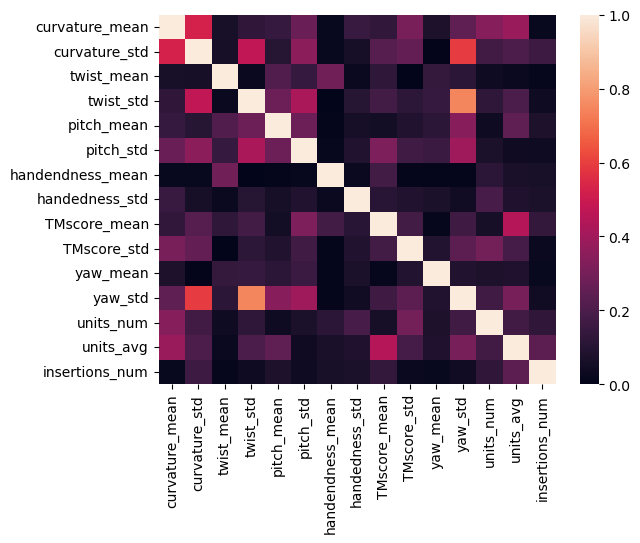

In [10]:
seaborn.heatmap(corr.iloc[1:,1:],vmin=0,vmax=1)

- Standard deviations have a negative correlation with the mean TM-score
- Number of units has no correlation with standard deviations
- Curvature is strongly correlated with twist and pitch
- Twist is very strongly correlated with pitch

## Distributions

#### Curvature

<Axes: title={'center': 'curvature_mean'}, xlabel='ct'>

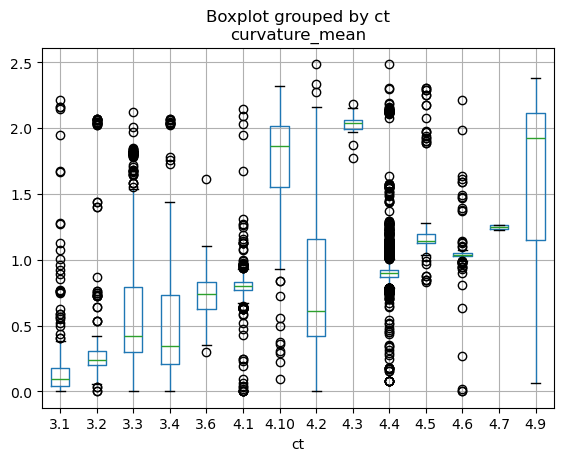

In [11]:
prot_data.boxplot(column='curvature_mean',by='ct')

<Axes: title={'center': 'curvature_std'}, xlabel='ct'>

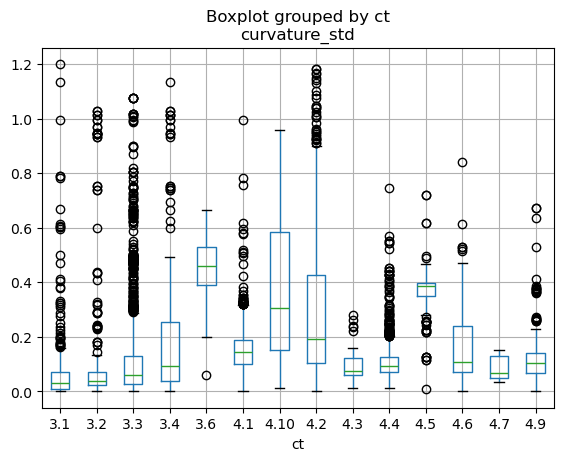

In [64]:
prot_data.boxplot(column='curvature_std',by='ct')

#### Twist

<Axes: title={'center': 'twist_mean'}, xlabel='ct'>

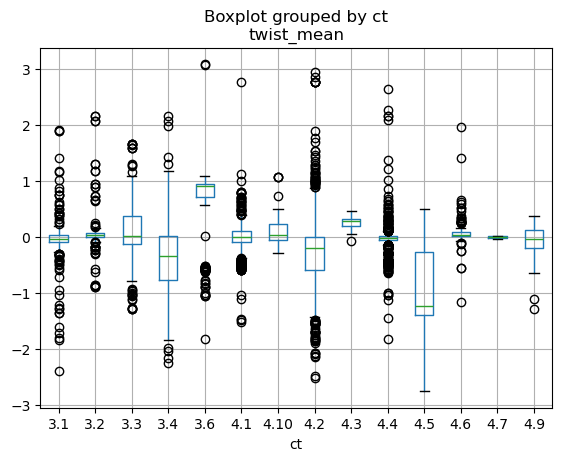

In [12]:
prot_data.boxplot(column='twist_mean',by='ct')

<Axes: title={'center': 'twist_std'}, xlabel='ct'>

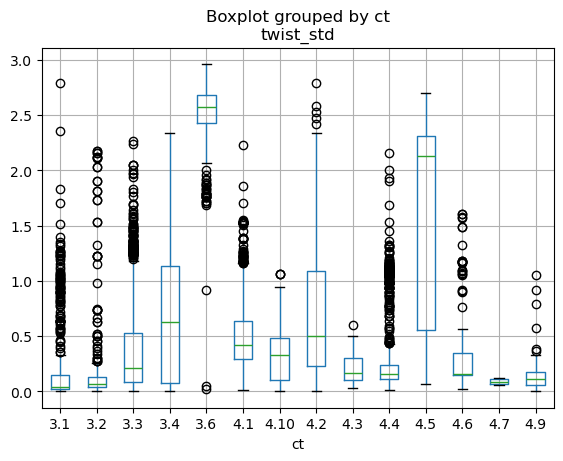

In [13]:
prot_data.boxplot(column='twist_std',by='ct')

#### Pitch

<Axes: title={'center': 'pitch_mean'}, xlabel='ct'>

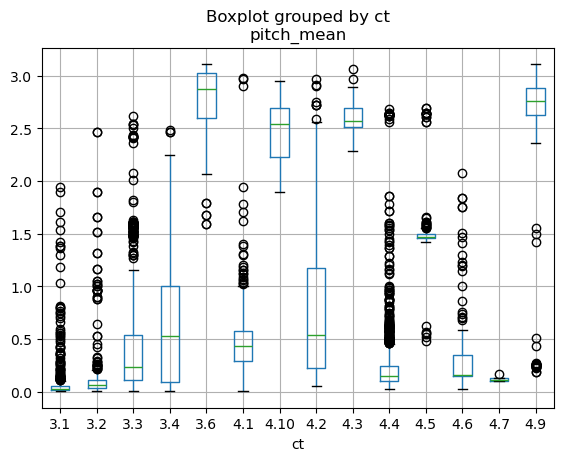

In [67]:
prot_data.boxplot(column='pitch_mean',by='ct')

<Axes: title={'center': 'pitch_std'}, xlabel='ct'>

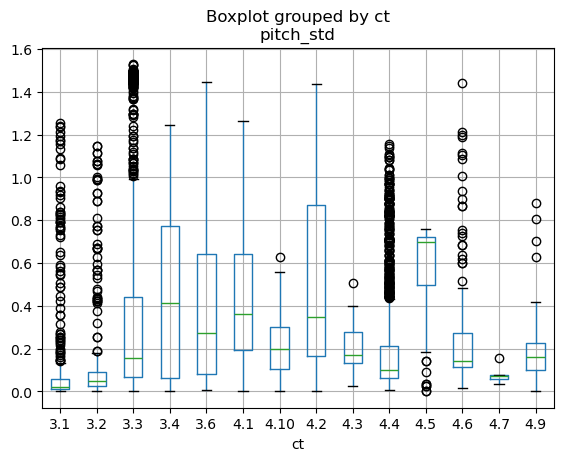

In [68]:
prot_data.boxplot(column='pitch_std',by='ct')

#### Handedness

<Axes: title={'center': 'handendness_mean'}, xlabel='ct'>

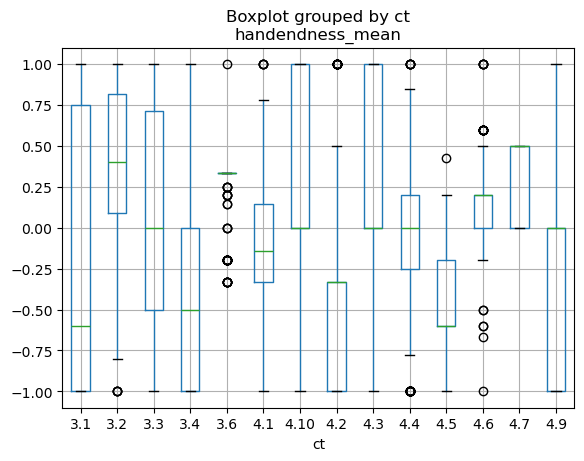

In [69]:
prot_data.boxplot(column='handendness_mean',by='ct')

#### Yaw

<Axes: title={'center': 'yaw_mean'}, xlabel='ct'>

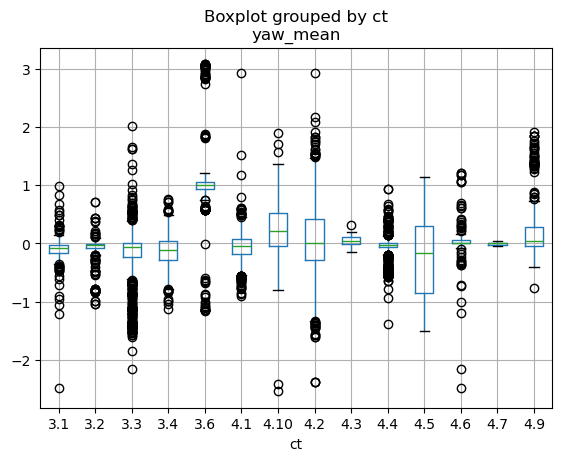

In [27]:
prot_data.boxplot(column='yaw_mean',by='ct')

<Axes: title={'center': 'yaw_std'}, xlabel='ct'>

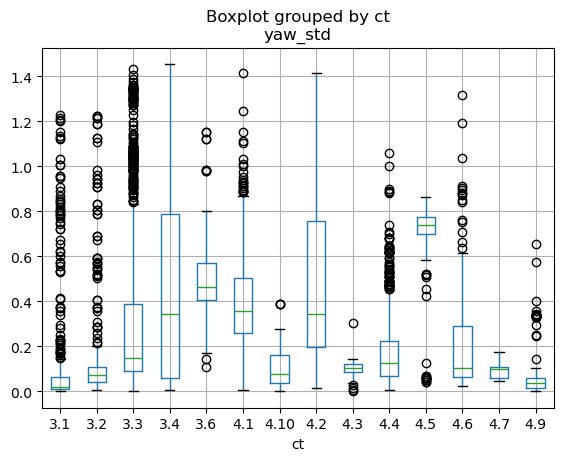

In [85]:
prot_data.boxplot(column='yaw_std',by='ct')

### Mean TM-score VS standard deviations

Text(0.5, 1.0, 'TMscore mean VS twist std')

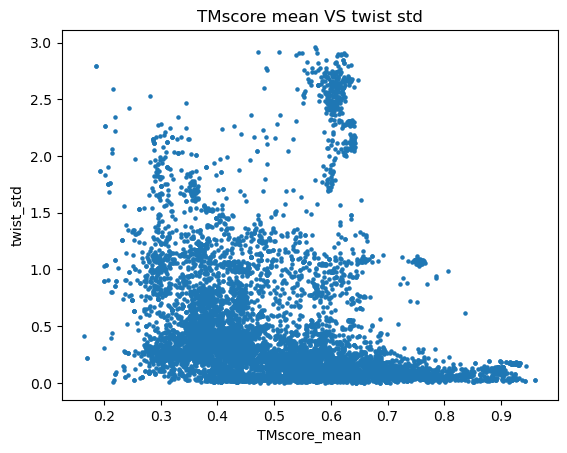

In [14]:
prot_data.plot.scatter(x='TMscore_mean',y='twist_std',s=5)
plt.title('TMscore mean VS twist std')

Text(0.5, 1.0, 'TMscore mean VS pitch std')

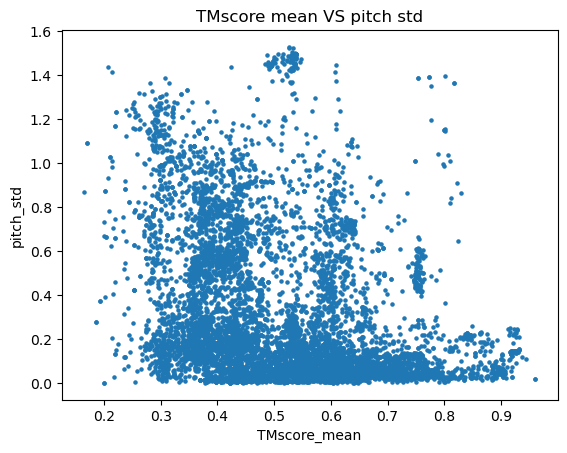

In [71]:
prot_data.plot.scatter(x='TMscore_mean',y='pitch_std',s=5)
plt.title('TMscore mean VS pitch std')

### Scatterplots of mean vs std

#### Curvature

Text(0.5, 1.0, 'Curvature mean vs std in open repeats')

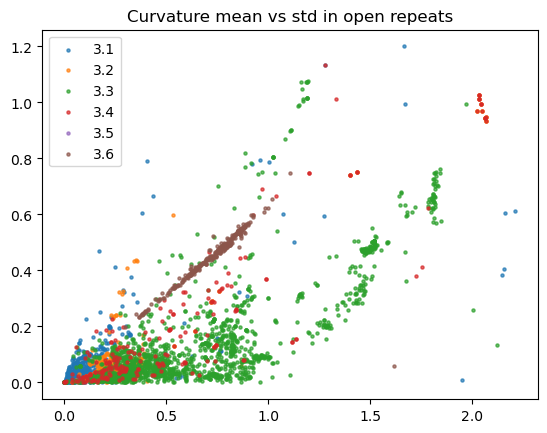

In [15]:
for ct in sol_cts:
    plot_data=prot_data[prot_data['ct']==ct]
    plt.scatter(plot_data['curvature_mean'],plot_data['curvature_std'],s=5,alpha=0.7,label=ct)
plt.legend()
plt.title('Curvature mean vs std in open repeats')

Text(0.5, 1.0, 'Curvature mean vs std in closed repeats')

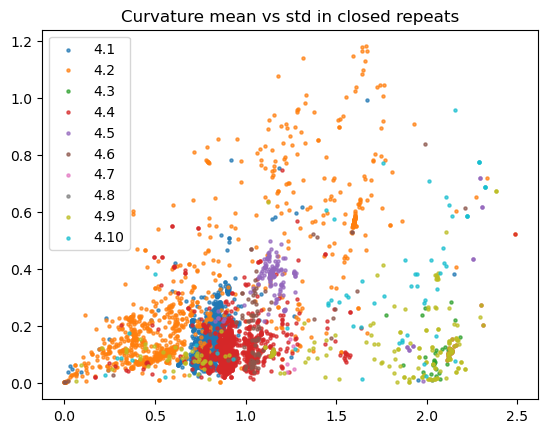

In [73]:
for ct in closed_cts:
    plot_data=prot_data[prot_data['ct']==ct]
    plt.scatter(plot_data['curvature_mean'],plot_data['curvature_std'],s=5,alpha=0.7,label=ct)
plt.legend()
plt.title('Curvature mean vs std in closed repeats')

#### Twist

Text(0.5, 1.0, 'twist mean vs std in open repeats')

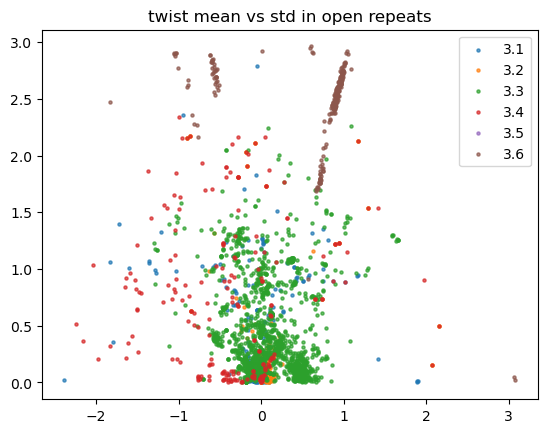

In [16]:
for ct in sol_cts:
    plot_data=prot_data[prot_data['ct']==ct]
    plt.scatter(plot_data['twist_mean'],plot_data['twist_std'],s=5,alpha=0.7,label=ct)
plt.legend()
plt.title('twist mean vs std in open repeats')

Text(0.5, 1.0, 'twist mean vs std in closed repeats')

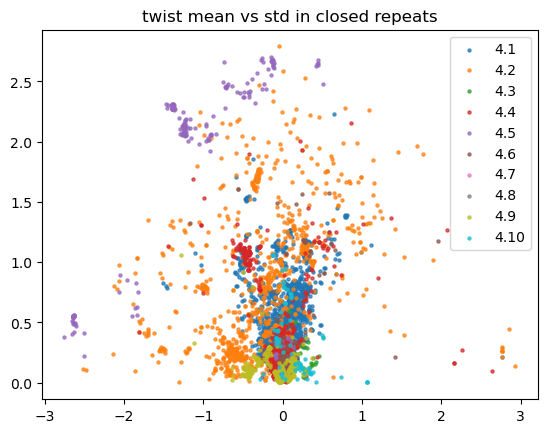

In [17]:
for ct in closed_cts:
    plot_data=prot_data[prot_data['ct']==ct]
    plt.scatter(plot_data['twist_mean'],plot_data['twist_std'],s=5,alpha=0.7,label=ct)
plt.legend()
plt.title('twist mean vs std in closed repeats')

#### Pitch

Text(0.5, 1.0, 'pitch mean vs std in open repeats')

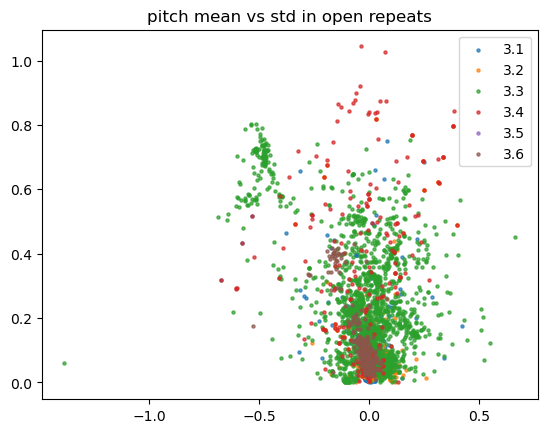

In [18]:
for ct in sol_cts:
    plot_data=prot_data[prot_data['ct']==ct]
    plt.scatter(plot_data['pitch_mean'],plot_data['pitch_std'],s=5,alpha=0.7,label=ct)
plt.legend()
plt.title('pitch mean vs std in open repeats')

Text(0.5, 1.0, 'pitch mean vs std in closed repeats')

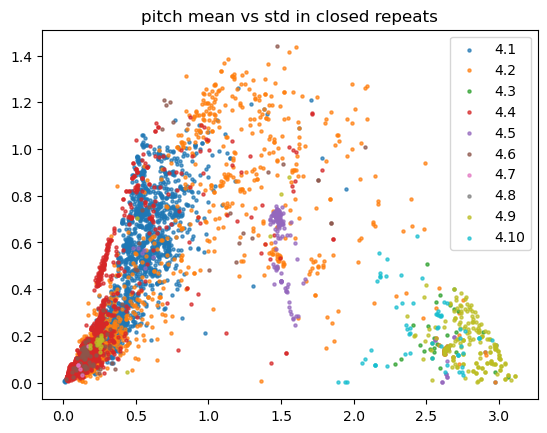

In [77]:
for ct in closed_cts:
    plot_data=prot_data[prot_data['ct']==ct]
    plt.scatter(plot_data['pitch_mean'],plot_data['pitch_std'],s=5,alpha=0.7,label=ct)
plt.legend()
plt.title('pitch mean vs std in closed repeats')

#### Yaw

Text(0.5, 1.0, 'yaw mean vs std in open repeats')

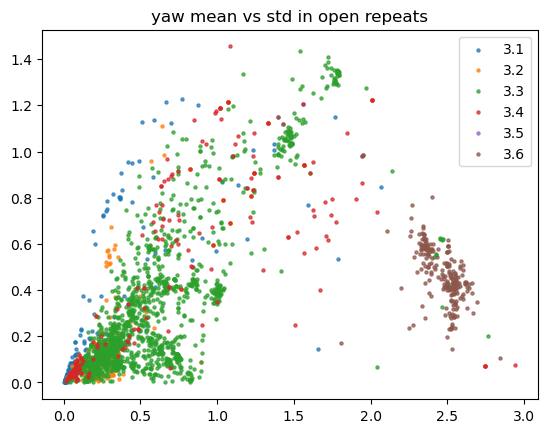

In [86]:
for ct in sol_cts:
    plot_data=prot_data[prot_data['ct']==ct]
    plt.scatter(plot_data['yaw_mean'],plot_data['yaw_std'],s=5,alpha=0.7,label=ct)
plt.legend()
plt.title('yaw mean vs std in open repeats')

Text(0.5, 1.0, 'yaw mean vs std in closed repeats')

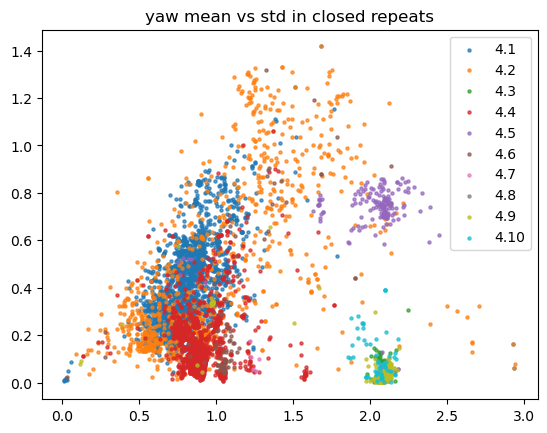

In [87]:
for ct in closed_cts:
    plot_data=prot_data[prot_data['ct']==ct]
    plt.scatter(plot_data['yaw_mean'],plot_data['yaw_std'],s=5,alpha=0.7,label=ct)
plt.legend()
plt.title('yaw mean vs std in closed repeats')

### Scatterplots of curvature vs twist vs pitch (means)

#### Curvature vs twist

Text(0.5, 1.0, 'curvature vs twist in open repeats')

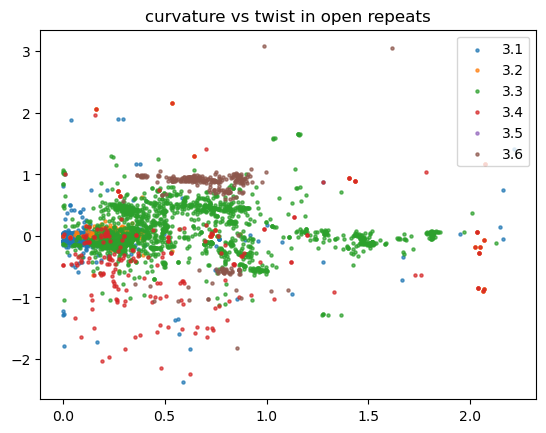

In [20]:
for ct in sol_cts:
    plot_data=prot_data[prot_data['ct']==ct]
    plt.scatter(plot_data['curvature_mean'],plot_data['twist_mean'],s=5,alpha=0.7,label=ct)
plt.legend()
plt.title('curvature vs twist in open repeats')

Text(0.5, 1.0, 'curvature vs twist in closed repeats')

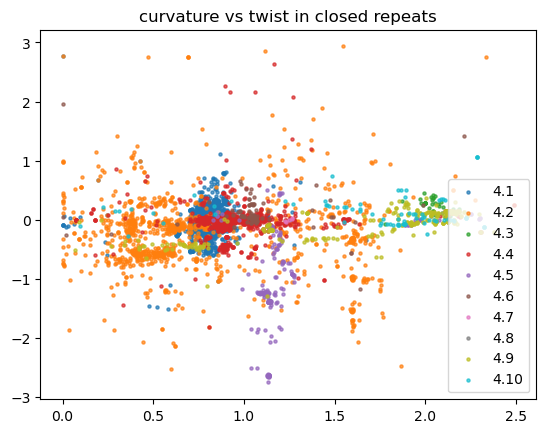

In [21]:
for ct in closed_cts:
    plot_data=prot_data[prot_data['ct']==ct]
    plt.scatter(plot_data['curvature_mean'],plot_data['twist_mean'],s=5,alpha=0.7,label=ct)
plt.legend()

plt.title('curvature vs twist in closed repeats')

#### Twist vs pitch

Text(0.5, 1.0, 'pitch vs twist in open repeats')

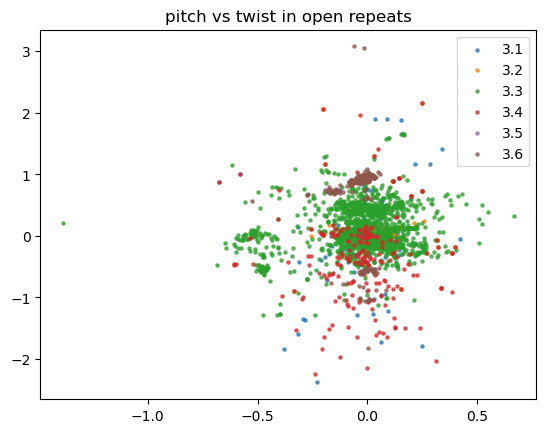

In [22]:
for ct in sol_cts:
    plot_data=prot_data[prot_data['ct']==ct]
    plt.scatter(plot_data['pitch_mean'],plot_data['twist_mean'],s=5,alpha=0.7,label=ct)
plt.legend()

plt.title('pitch vs twist in open repeats')

Text(0.5, 1.0, 'pitch vs twist in closed repeats')

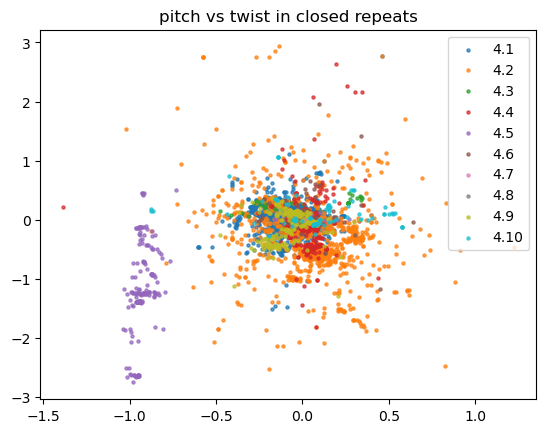

In [23]:
for ct in closed_cts:
    plot_data=prot_data[prot_data['ct']==ct]
    plt.scatter(plot_data['pitch_mean'],plot_data['twist_mean'],s=5,alpha=0.7,label=ct)
plt.legend()

plt.title('pitch vs twist in closed repeats')

#### Curvature vs pitch

Text(0.5, 1.0, 'pitch vs curvature in open repeats')

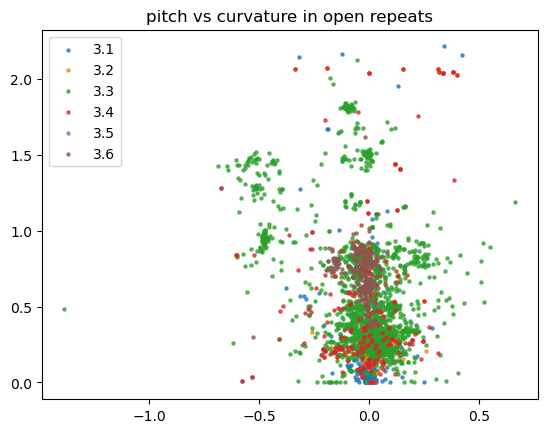

In [24]:
for ct in sol_cts:
    plot_data=prot_data[prot_data['ct']==ct]
    plt.scatter(plot_data['pitch_mean'],plot_data['curvature_mean'],s=5,alpha=0.7,label=ct)
plt.legend()

plt.title('pitch vs curvature in open repeats')

Text(0.5, 1.0, 'pitch vs curvature in closed repeats')

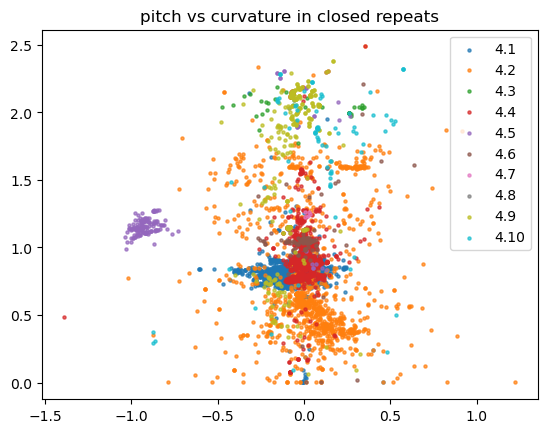

In [25]:
for ct in closed_cts:
    plot_data=prot_data[prot_data['ct']==ct]
    plt.scatter(plot_data['pitch_mean'],plot_data['curvature_mean'],s=5,alpha=0.7,label=ct)
plt.legend()

plt.title('pitch vs curvature in closed repeats')

#### Yaw vs curvature

Text(0.5, 1.0, 'yaw vs curvature in open repeats')

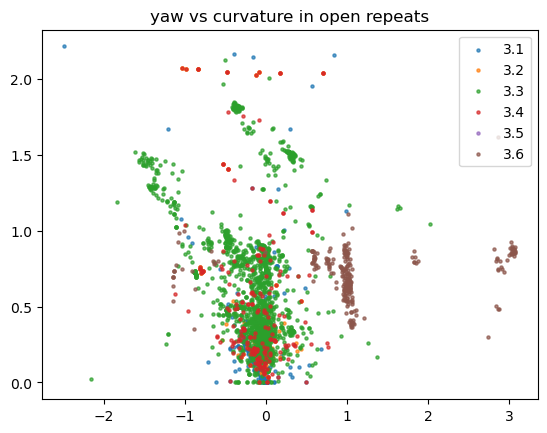

In [26]:
for ct in sol_cts:
    plot_data=prot_data[prot_data['ct']==ct]
    plt.scatter(plot_data['yaw_mean'],plot_data['curvature_mean'],s=5,alpha=0.7,label=ct)
plt.legend()

plt.title('yaw vs curvature in open repeats')

Text(0.5, 1.0, 'yaw vs curvature in closed repeats')

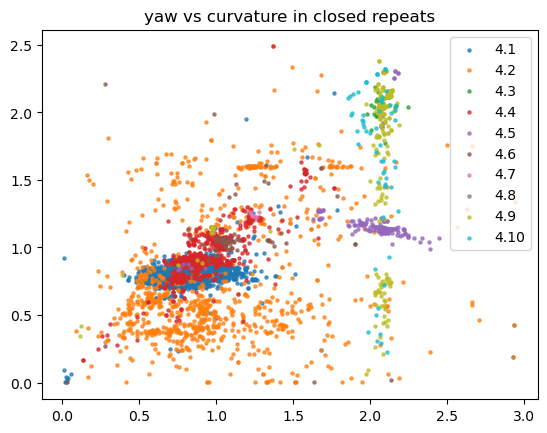

In [89]:
for ct in closed_cts:
    plot_data=prot_data[prot_data['ct']==ct]
    plt.scatter(plot_data['yaw_mean'],plot_data['curvature_mean'],s=5,alpha=0.7,label=ct)
plt.legend()

plt.title('yaw vs curvature in closed repeats')